# Seaborn Exercises

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Iris Data

In [171]:
iris = sns.load_dataset('iris')

In [200]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
56,6.3,3.3,4.7,1.6,versicolor
36,5.5,3.5,1.3,0.2,setosa
21,5.1,3.7,1.5,0.4,setosa
29,4.7,3.2,1.6,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa


In [173]:
sns.pairplot(iris)
sns.pairplot(hue='species', data=iris)

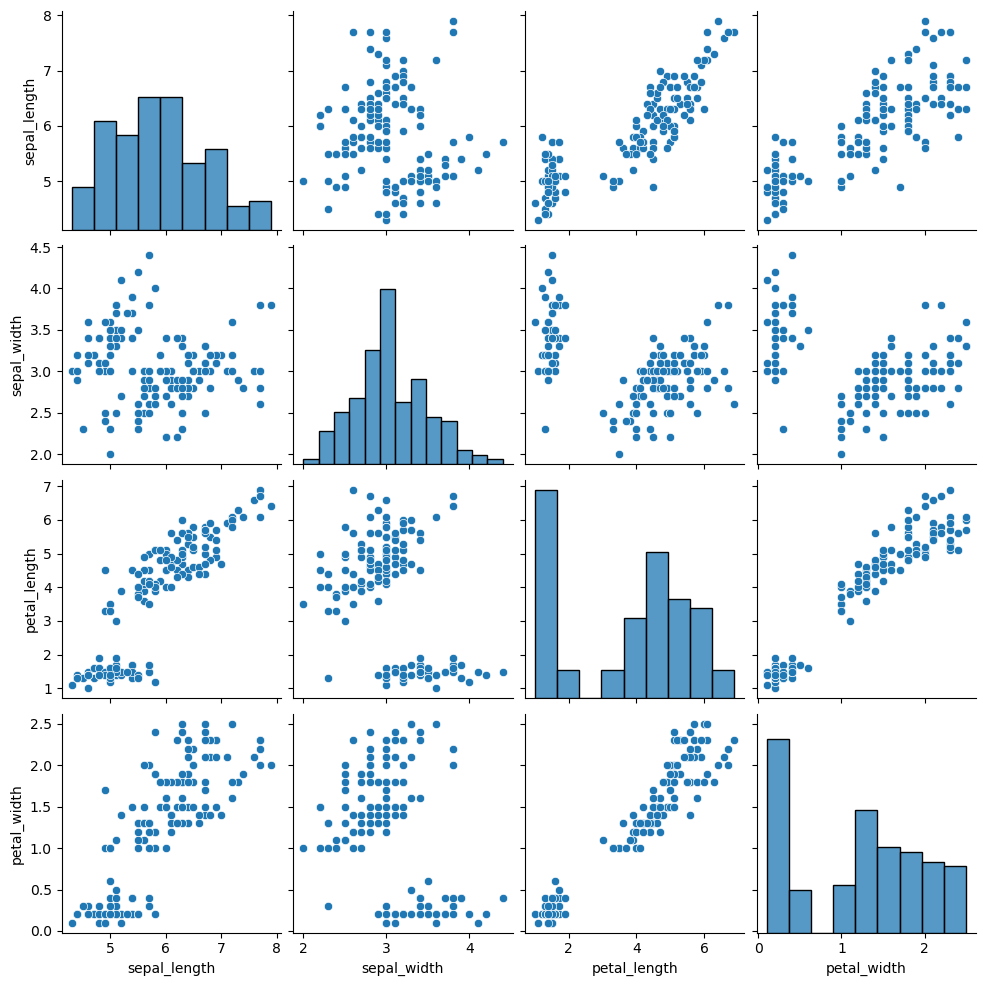

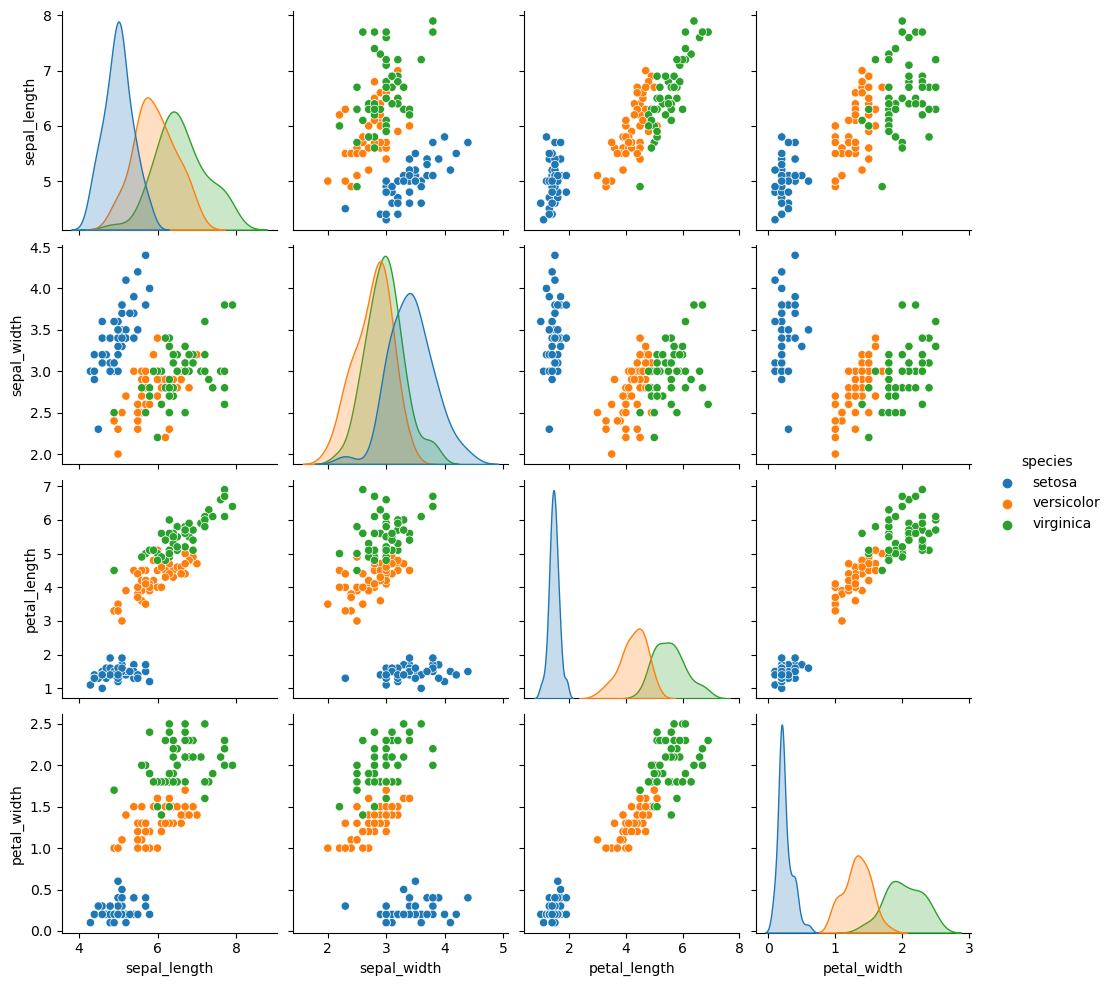

In [174]:
plt.show()

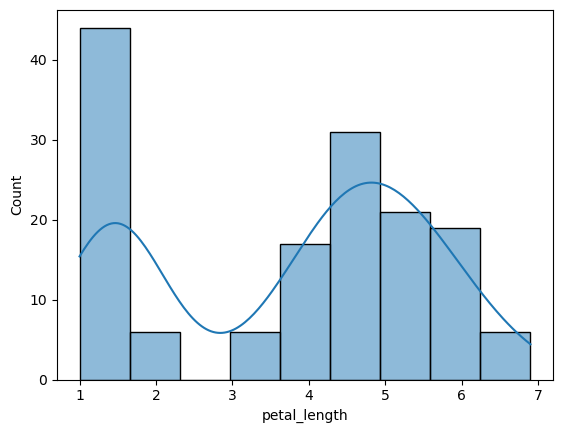

In [175]:
# What does the distribution of petal lengths look like?
sns.histplot(iris.petal_length, kde=True)
plt.show()

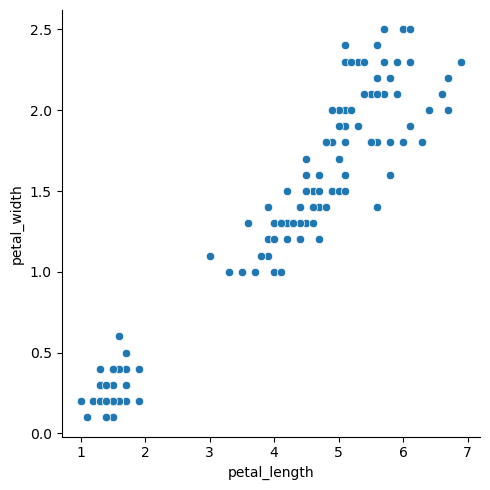

In [176]:
# Is there a relationship between petal length and petal width?
sns.relplot(x='petal_length', y='petal_width', data=iris)
plt.show()

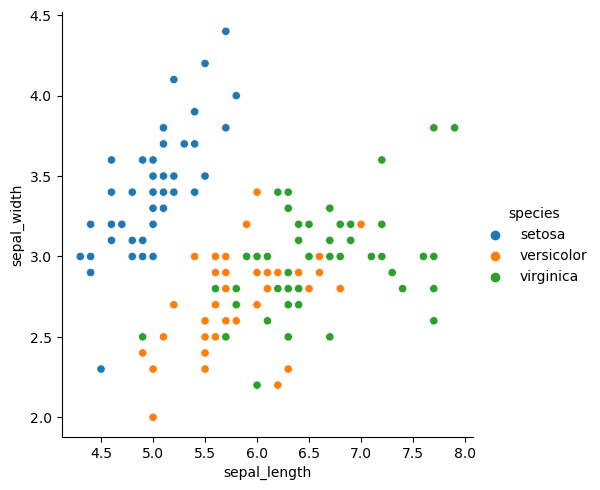

In [177]:
# Would it be reasonable to predict species based on sepal
# width and sepal length? For this, you'll visualize two
# numeric columns through the lense of a categorical column.
sns.relplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.show()

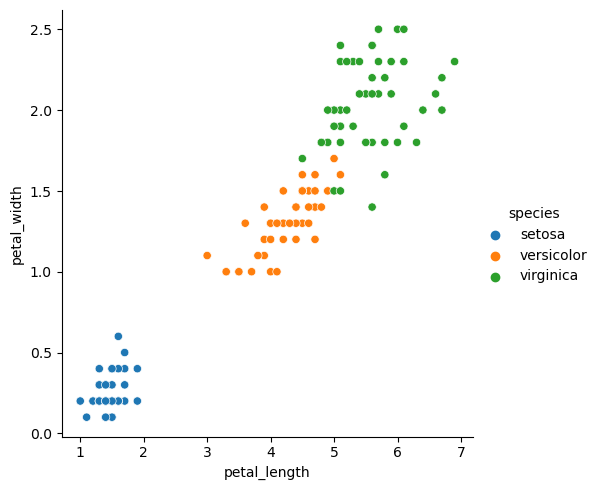

In [178]:
# Which features would be best used to predict species?
sns.relplot(x='petal_length', y='petal_width', hue='species', data=iris)
plt.show()

### anscombe data

1. Load the `anscombe` dataset from seaborn. Use pandas to group the data by the `dataset` column, and calculate summary statistics for each dataset. What do you notice?
- Plot the x and y values from the `anscombe` data. Each dataset should be in a separate column.

In [179]:
ac = sns.load_dataset('anscombe')

In [180]:
ac.groupby('dataset').describe().T

dataset          I         II        III         IV
x count  11.000000  11.000000  11.000000  11.000000
  mean    9.000000   9.000000   9.000000   9.000000
  std     3.316625   3.316625   3.316625   3.316625
  min     4.000000   4.000000   4.000000   8.000000
  25%     6.500000   6.500000   6.500000   8.000000
  50%     9.000000   9.000000   9.000000   8.000000
  75%    11.500000  11.500000  11.500000   8.000000
  max    14.000000  14.000000  14.000000  19.000000
y count  11.000000  11.000000  11.000000  11.000000
  mean    7.500909   7.500909   7.500000   7.500909
  std     2.031568   2.031657   2.030424   2.030579
  min     4.260000   3.100000   5.390000   5.250000
  25%     6.315000   6.695000   6.250000   6.170000
  50%     7.580000   8.140000   7.110000   7.040000
  75%     8.570000   8.950000   7.980000   8.190000
  max    10.840000   9.260000  12.740000  12.500000

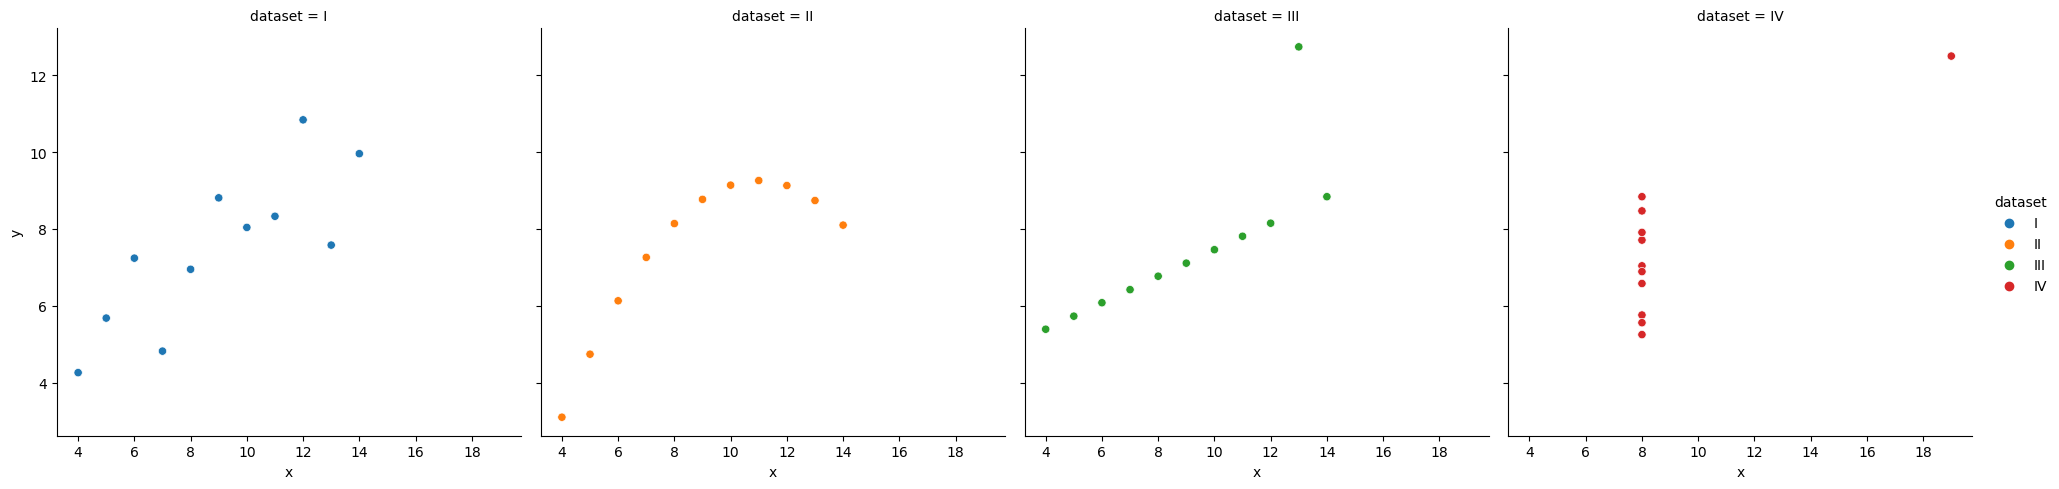

In [181]:
sns.relplot(data=ac, x='x', y='y', hue='dataset', col='dataset')
plt.show()

2. Load the `InsectSprays` dataset from pydataset and read it's documentation. Create a `boxplot` that shows the effectiveness of the different insect sprays.

In [182]:
from pydataset import data

In [183]:
# data('InsectSprays', show_doc=True)

In [184]:
insect = data('InsectSprays')
insect.sample(5)

,count,spray
72,13,F
28,2,C
13,11,B
30,1,C
64,22,F


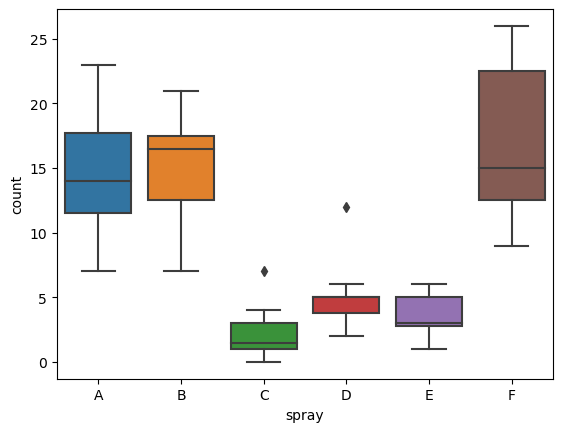

In [185]:
sns.boxplot(data=insect, x='spray', y='count')
plt.show()

3. Load the `swiss` dataset from pydataset and read it's documentation. Create visualizations to answer the following questions:
- Create an attribute named `is_catholic` that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
- Does whether or not a province is Catholic influence fertility?
- What measure correlates most strongly with fertility?

In [186]:
# data('swiss',show_doc=True)

In [256]:
swiss = data('swiss')
swiss.sample(5)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Broye,83.8,70.2,16,7,92.85,23.6
Entremont,69.3,84.9,7,6,99.68,19.8
Cossonay,61.7,69.3,22,5,2.82,18.7
Conthey,75.5,85.9,3,2,99.71,15.1
Aigle,64.1,62.0,21,12,8.52,16.5


In [258]:
swiss['is_catholic'] = swiss.Catholic>50

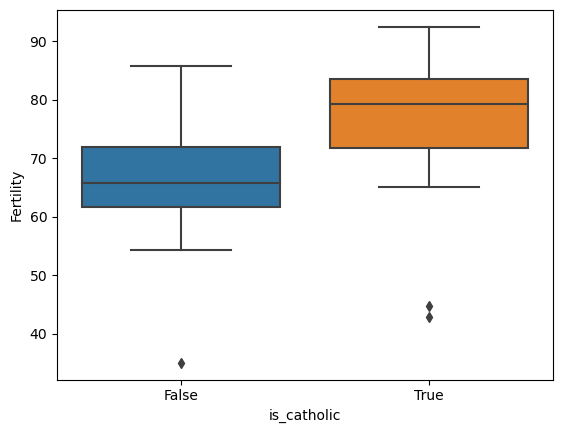

In [259]:
# sns.relplot(data=swiss, y='Province', x='Fertility', hue='is_catholic')
sns.boxplot(data=swiss, x='is_catholic', y='Fertility')
plt.show()

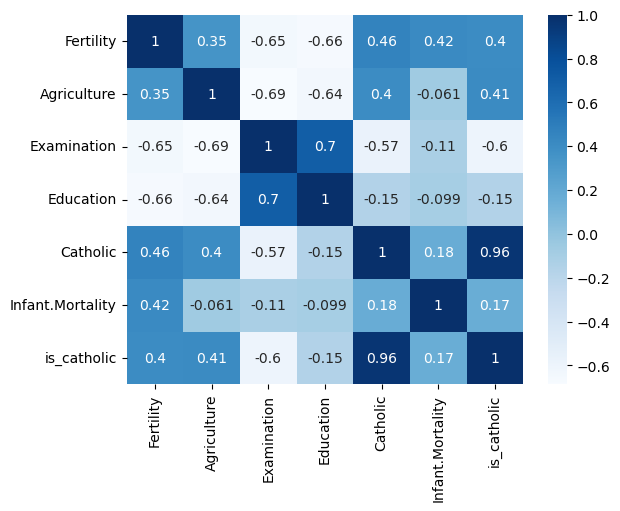

In [260]:
# sns.pairplot(data=swiss, y_vars='Fertility')
sns.heatmap(data=swiss.corr(), annot=True, cmap='Blues')
plt.show()

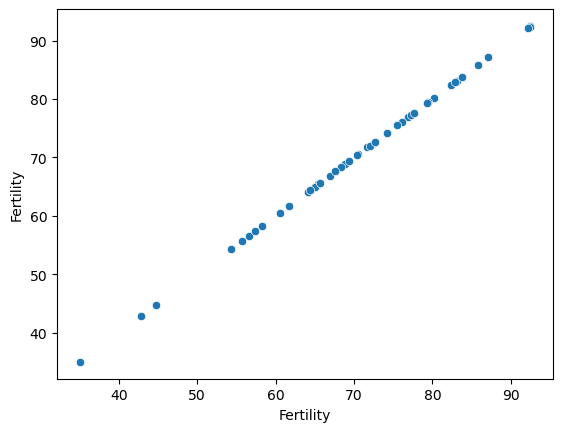

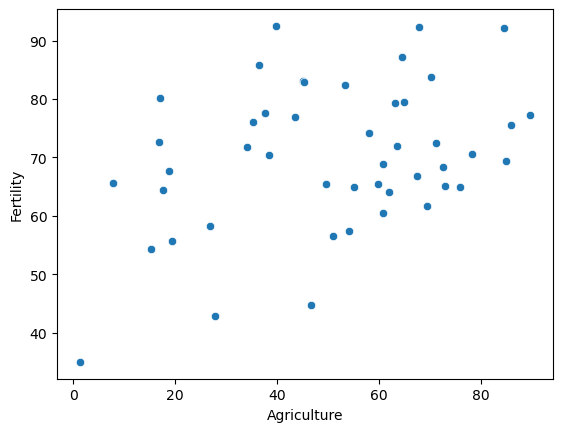

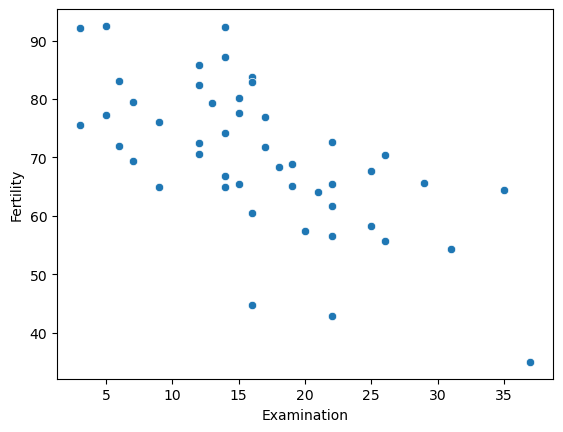

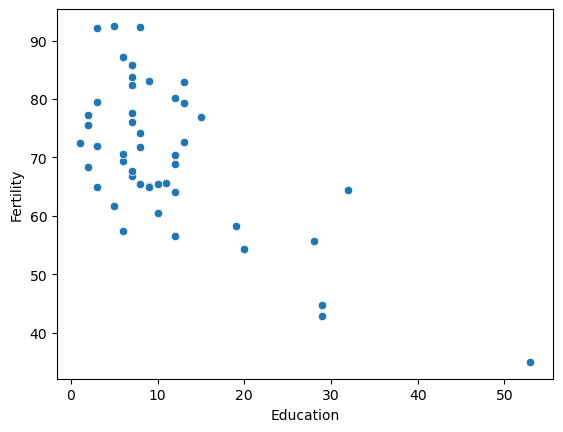

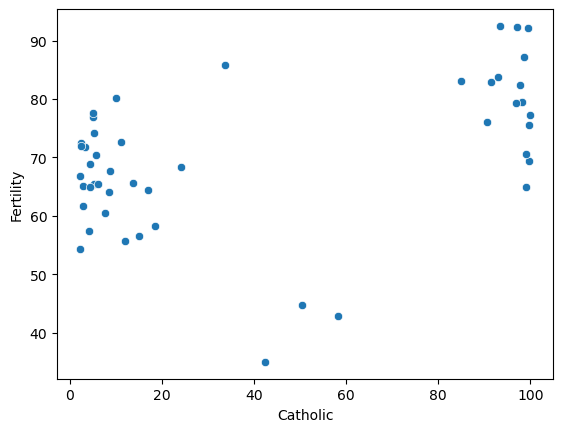

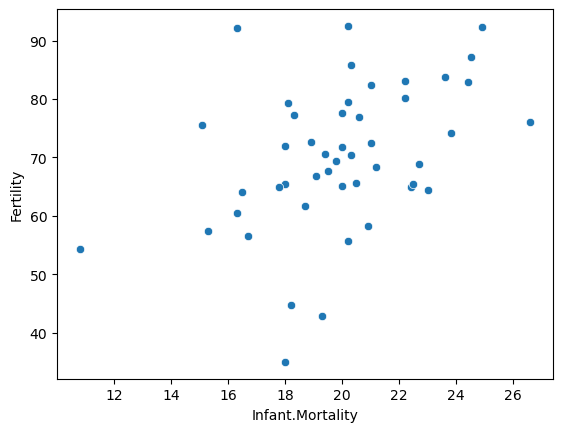

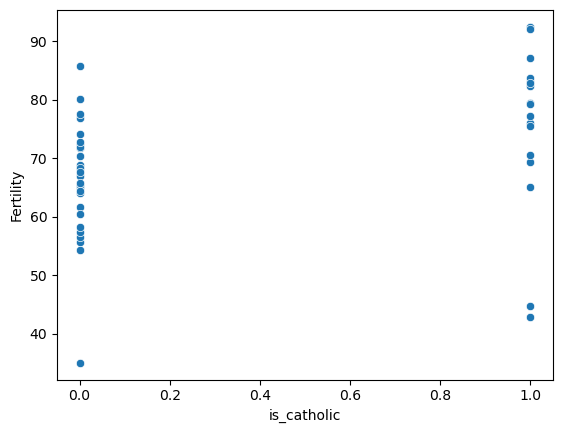

In [261]:
for col in swiss:
        sns.scatterplot(data=swiss, y='Fertility', x=col)
        plt.show()

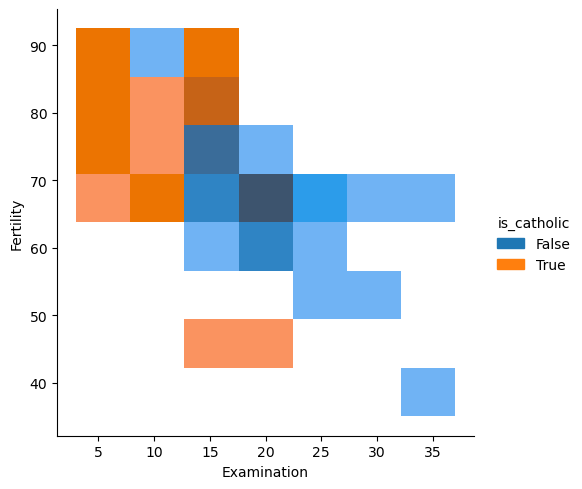

In [263]:
sns.displot(data=swiss, x='Examination', y='Fertility', hue='is_catholic')
# sns.displot(data=swiss, x='Education', y='Fertility', hue='is_catholic')
plt.show()

4. Load the `chipotle` dataset from SQL, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [192]:
from env import get_db_url
chipotle = pd.read_sql('select * from orders', get_db_url('chipotle'))
chipotle.sample(5)

,id,order_id,quantity,item_name,choice_description,item_price
387,388,168,1,Steak Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",$11.75
3536,3537,1422,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Pinto Beans, Cheese, Sour Cream, Guacam...",$11.25
1101,1102,454,1,Chips and Tomatillo-Red Chili Salsa,nan,$2.39
3766,3767,1508,1,6 Pack Soft Drink,[Coke],$6.49
4211,4212,1680,1,Bottled Water,nan,$1.50


In [193]:
chipotle.item_price=(chipotle.item_price.str.replace('$','', regex=False)).astype(float)

In [194]:
# chips = chipotle[chipotle.item_name.isin(list(chipotle.item_name.value_counts().nlargest(4).index))]
chips = chipotle[chipotle.item_name.isin(list(chipotle.groupby('item_name').quantity.sum().nlargest(4).index))]

In [202]:
chip = pd.DataFrame(chips.groupby('item_name').item_price.sum().sort_values(ascending=False)).reset_index()
chip

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


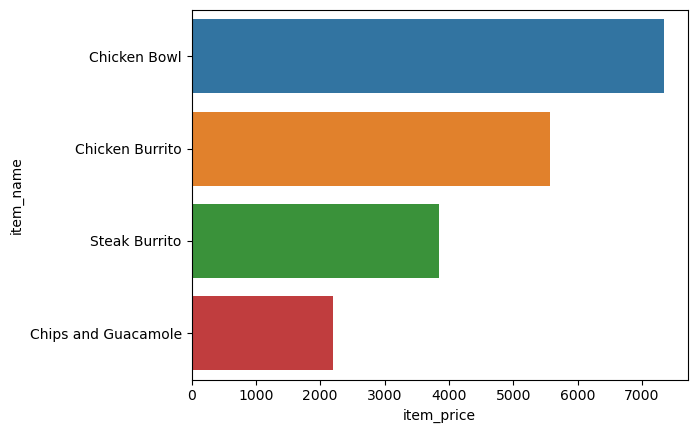

In [264]:
sns.barplot(data=chip, y='item_name', x='item_price')
plt.show()

5. Load the `sleepstudy` dataset from pydataset and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominent line showing the average change in reaction time.

In [197]:
# data('sleepstudy', show_doc=True)

In [198]:
slp = data('sleepstudy')
slp.sample(5)

,Reaction,Days,Subject
33,283.8565,2,330
58,346.8311,7,332
7,382.2038,6,308
172,273.4740,1,372
65,297.1710,4,333


In [266]:
slp.Subject = slp.Subject.astype(str)

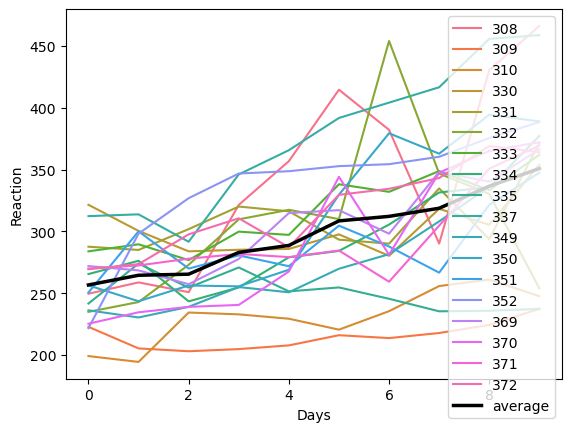

In [267]:
sns.lineplot(data=slp, x='Days', y='Reaction', hue='Subject')
sns.lineplot(x="Days", y="Reaction", data=slp, color="black", ci=None, linewidth=2.5, label='average')
plt.show()